In [1]:
from main import *

In [2]:
train_csv = "./data/train.csv"
test_csv = "./data/test.csv"

In [ ]:
model, R2 = sklearn_model(train_csv, 3)
print(R2)

/Users/dipalshah/.conda/envs/LearnPython/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/dipalshah/.conda/envs/LearnPython/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dipalshah/.conda/envs/LearnPython/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/dipalshah/.conda/envs/LearnPython/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse i

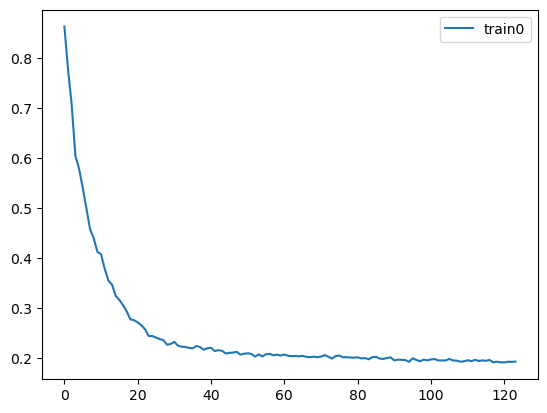

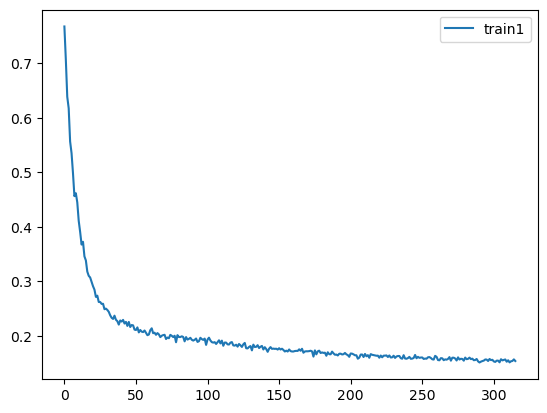

In [ ]:
import matplotlib.pyplot as plt

for i, y in enumerate(model.estimators_):
    plt.plot(y.train_score_, label = f"train{i}")
    plt.legend()
    plt.show()

In [ ]:
make_submit_file(model, test_csv)

/Users/dipalshah/.conda/envs/LearnPython/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/dipalshah/.conda/envs/LearnPython/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dipalshah/.conda/envs/LearnPython/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/dipalshah/.conda/envs/LearnPython/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse i